# 선형판별분석법(LDA)

- **PCA(주성분 분석법: Principal Component Analysis)**은 데이타의 **최적 표현**의 견지에서 데이타 차원을 축소하는 방법
- **LDA(선형판별 분석법: Linear Discriminent Analysis)**은 데이타의 **최적 분류**의 견지에서 데이타 차원을 축소하는 방법
  - (목적) 가능한 클래스 간의 분별정보를 최대한 유지시키면서 차원을 축소
  - D-차원 표본 데이타 집합 $X=\{x^{(1},x^{(2},\cdots,x^{(N}\}$ 가 주어진 경우, $\omega_1$클래스에 속하는 것이 $N_1$개이고, $\omega_2$클래스에 속하는 것이 $N_2$개 일  때, $x^{(i}$를 임의의 선을 따라서 사영하여 스칼라 $y$를 얻고자 한다.
  $$ y = W^Tx $$
  - 가능한 모든 선들 중에서 이러한 $\omega_1$ 과 $\omega_2$의 스칼라 값들의 분리를 최대화 하는 것을 선택한다.( 예: 2차원의 경우 다음과 같다)

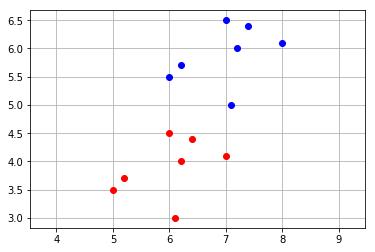

In [3]:
import matplotlib.pyplot as plt
X = [[5,5.2,6,6.1,6.2,6.4,7], [3.5,3.7,4.5,3,4,4.4,4.1]]
plt.plot(X[0], X[1], 'ro')
Y = [[6,6.2,7,7.1,7.2,7.4,8], [5.5,5.7,6.5,5,6,6.4,6.1]]
plt.plot(Y[0], Y[1], 'bo')
plt.axis('equal')
plt.grid()
plt.show()

- 선형판별분석법(LDA)은 특징 공간 상에서 클래스분리를 최대화 하는 주축으로 사상시켜 선형 부공간으로 차원을 축소하는 방법이다.
- 선형판별분석법(LDA)에서는 클래스간 분산(between-class scatter)과 클래스내 분산(within-class scatter)의 비율을 최대화하는 방식으로 데이타에 대한 특징벡터의 차원을 축소한다.
$$ \text{클래스간 분산(between-class Scatter)} \over \text{클래스내 분산(within-class Scatter) }$$

### 2진 분류에 적용된 LDA
어느 사영을 취하는 것이 좋을 것인가? ==> 좋은 사영을 찾기 위해서는 사영들 간의 분리정도를 측정할 수 있어야 한다.

선형변환에의 한 사영
$$ y = w^Tx $$
여기에서 w: Dx1, x: Dx1

평균을 기중 척도로 하면, 각 클래스들의 x와 y 에서의 평균백터는 다음과 같다.
$$ \mu_i = {1 \over N_i}\sum_{x\in\omega_i} x $$
$$ \tilde{\mu_i} = {1 \over N_i}\sum_{y\in\omega_i} y = {1 \over N_i}\sum_{x\in\omega_i} w^T x = w^T  \mu_i $$
이 때 사영된 데이터들의 중심(평균) 간의 거리를 목적함수로 선택하면 
$$ J(W) = \bracevert \tilde{\mu_1} - \tilde{\mu_2}\bracevert = \bracevert w^T ( \mu_1 -\mu_2  )\bracevert $$
하지만, 이렇게 평균 만을 고려하면, 클래스 안에서의 표준편차가 고려되지 않으므로 좋은 척도가 아니다.

Fisher 에 의해서 제안된 방법은 클래스내(within-class)의 스캐터로 정규화한 평균들간의 차이로 표현된 함수를 최대화 시키는 것이다.
각 클래스들에 대하여 스캐터는 다음과 같이 주어지며

$$ \tilde {S_i} = \sum_{y\in\omega_i} (y-\tilde{\mu_i})^2= \sum_{y\in\omega_i} (y-\tilde{\mu_i})(y-\tilde{\mu_i})^T$$

사영 표본들의 클래스내 분산(within-class scatter) 
$$ S_B = (\tilde {S_1} + \tilde {S_2} ) $$

따라서, Ficher 의 선형판별은 다음의 목적함수를 최대화 하는 선형함수 $w^Tx$에 해당한다.
$$ J(w) = { \bracevert \tilde{\mu_1} - \tilde{\mu_2}\bracevert ^2 \over \tilde {S_1} + \tilde {S_2} }$$
따라서, Fisher의 선형판펼식은 동일한 클래스의 표본들은 인접하게 사영이 취해지고, 동시에 클래스 간의 사영은 중심들이 가능한 멀리 떨어지게 하는 변환 행렬($w$)를 찾아내는 것이다.

어떻게 변환행렬($w$) 에 대한 함수로 표현되는 위의 목적함수 $J(w)$를 최대화 하는 변환행렬 $w$를 찾을 것인가?

최적의 사영 $\bf{w}$를 구하기 위해서는 $J(\bf{w})$를 $\bf{w}$에 대한 함수로 표현해야 한다. 
다차원 특징공간에서 스캐터행렬은 사영상에서 분산과 동일한 형태
$$ \bf{S_i} = \sum_{x\in\omega_i} (x-\mu_i)(x-\mu_i)^T $$
따라서, 클래스내 스캐터행렬 $$ S_w = S_1 + S_2 $$
사영된 $\bf{y}$의 스캐터를 특징백터 $\bf{x}$의 스캐터 행렬의 함수로 다음과 같이 표현이 된다.

\begin{align*}
\bf{\tilde S_i} &= \sum_{y\in\omega_i} \bf{(y-\tilde{\mu_i})(y-\tilde{\mu_i})^T} \\
                  &= \sum_{y\in\omega_i} \bf{(w^Tx-w^T\mu_i)(w^Tx-w^T\mu_i)^T}\\
                  & = \sum_{y\in\omega_i} \bf{w^T(x-\mu_i)(x-\mu_i)^T}w\\
                  & =  \bf{w^T S_i w} \\
\end{align*}
따라서
$$ \bf { \tilde {S}_w = \tilde{S}_1 + \tilde{S}_2 = w^T S_w w}$$



마찬가지로 사영된 평균들 간의 차이(~분산)를 원래의 특징공간에서의 평균들 간의 차이로 다음과 같이 동일한 표현될 수 있다.

\begin{align*}
(\bf{\tilde\mu_1 - \tilde\mu_2})^2  &= (\bf{w^T \mu_1 - w^T \mu_2})^2 \\
&= 
\end{align*}